### Preparing Big Data environment

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [2]:
spark = SparkSession.builder.master('local').appName('Pyspark-project').getOrCreate()
sc = spark.sparkContext

In [3]:
sc.stop() #after u done with pyspark run sc.stop()

<SparkContext master=local appName=Pyspark-project>

#### Some data preprocessing stuff

In [4]:
df = spark.read.csv('Desktop/Data/heart.csv',header = True,inferSchema = True) 
# inferSchema takes first row and assign his type to column, if not use datatypes will be string

In [5]:
df.head() # it's showing only first row of each column

Row(_c0=0, age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.3, slope=0, ca=0, thal=1, target=1)

In [6]:
df.show(5) #for pyspark if we want to see dataframe we must use df.show()

+---+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|_c0|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|  0| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
|  1| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
|  2| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
|  3| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
|  4| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
+---+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [7]:
df = df.withColumnRenamed('_c0','index') #renaming index

In [8]:
df.dtypes

[('index', 'int'),
 ('age', 'int'),
 ('sex', 'int'),
 ('cp', 'int'),
 ('trestbps', 'int'),
 ('chol', 'int'),
 ('fbs', 'int'),
 ('restecg', 'int'),
 ('thalach', 'int'),
 ('exang', 'int'),
 ('oldpeak', 'double'),
 ('slope', 'int'),
 ('ca', 'int'),
 ('thal', 'int'),
 ('target', 'int')]

In [9]:
df.describe().show() # it looks like somesthing weirdo :D 

+-------+-----------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|            index|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+-----------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              303|               303|                303|               303|               303|        

In [10]:
df.describe('chol').show() # look one feature's stats

+-------+------------------+
|summary|              chol|
+-------+------------------+
|  count|               303|
|   mean|246.26402640264027|
| stddev| 51.83075098793005|
|    min|               126|
|    max|               564|
+-------+------------------+



In [11]:
df.select('age','sex', 'cp','trestbps', # if you want to look at describe()
          'chol','fbs','restecg','thalach',
          'exang','oldpeak','slope', 'ca',
          'thal','target').describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,303,54.366336633663366,9.08210098983786,29,77
sex,303,0.6831683168316832,0.46601082333962385,0,1
cp,303,0.966996699669967,1.0320524894832983,0,3
trestbps,303,131.62376237623764,17.5381428135171,94,200
chol,303,246.26402640264027,51.83075098793005,126,564
fbs,303,0.1485148514851485,0.35619787492797644,0,1
restecg,303,0.528052805280528,0.525859596359298,0,2
thalach,303,149.64686468646866,22.90516111491409,71,202
exang,303,0.32673267326732675,0.46979446452231655,0,1


In [12]:
df.toPandas().isnull().values.any().sum()

0

In [13]:
from pyspark.sql.functions import isnull, when, count, col # another way to show null values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|index|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|    0|  0|  0|  0|       0|   0|  0|      0|      0|    0|      0|    0|  0|   0|     0|
+-----+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



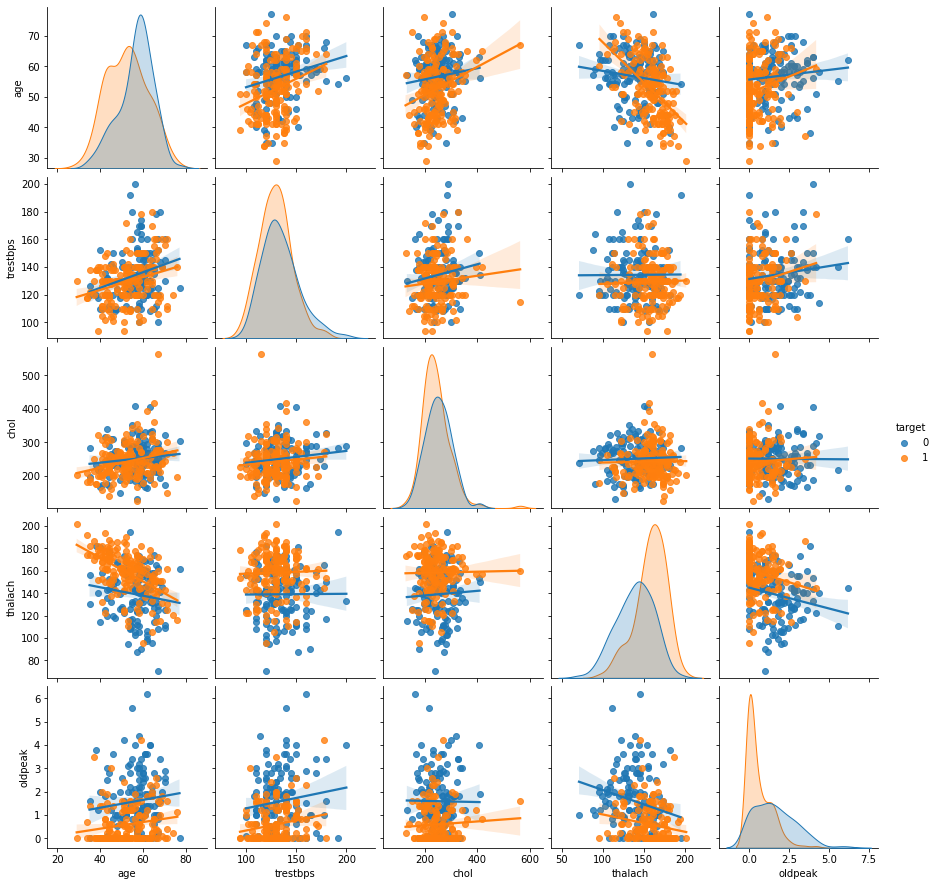

In [14]:
cor_df = df.drop('index','sex','cp','fbs','exang','restecg','slope','ca','thal').toPandas()
import seaborn as sns
sns.pairplot(cor_df,hue = 'target',kind = 'reg');

### Preparing data for modelling

#### for label


In [15]:
from pyspark.ml.feature import StringIndexer

In [16]:
StringIndexer = StringIndexer(inputCol = 'target',outputCol = 'label') 
# our data target label is already 0 and 1,but if u accept data other formats try this 

In [17]:
strind = StringIndexer.fit(df).transform(df)

In [18]:
df = strind.withColumn('label',strind['label'].cast('integer')) # converting label to integer type

#### for features

In [19]:
from pyspark.ml.feature import VectorAssembler


In [20]:
features = ['age','sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope', 'ca','thal']

In [21]:
vector = VectorAssembler(inputCols = features,outputCol = 'features')

In [22]:
vec_df = vector.transform(df)

In [23]:
ml_df = vec_df.select(['features','label'])

In [24]:
ml_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[63.0,1.0,3.0,145...|    0|
|[37.0,1.0,2.0,130...|    0|
|[41.0,0.0,1.0,130...|    0|
|[56.0,1.0,1.0,120...|    0|
|[57.0,0.0,0.0,120...|    0|
|[57.0,1.0,0.0,140...|    0|
|[56.0,0.0,1.0,140...|    0|
|[44.0,1.0,1.0,120...|    0|
|[52.0,1.0,2.0,172...|    0|
|[57.0,1.0,2.0,150...|    0|
|[54.0,1.0,0.0,140...|    0|
|[48.0,0.0,2.0,130...|    0|
|[49.0,1.0,1.0,130...|    0|
|[64.0,1.0,3.0,110...|    0|
|[58.0,0.0,3.0,150...|    0|
|[50.0,0.0,2.0,120...|    0|
|[58.0,0.0,2.0,120...|    0|
|[66.0,0.0,3.0,150...|    0|
|[43.0,1.0,0.0,150...|    0|
|[69.0,0.0,3.0,140...|    0|
+--------------------+-----+
only showing top 20 rows



#### Train-Test split

In [25]:
(training_data, test_data) = ml_df.randomSplit([.7,.3])

In [26]:
training_data.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(13,[0,1,3,4,7,10...|    0|
|(13,[0,1,3,4,7,10...|    0|
|(13,[0,2,3,4,7,10...|    0|
|(13,[0,2,3,4,7,10...|    0|
|(13,[0,3,4,6,7,10...|    0|
+--------------------+-----+
only showing top 5 rows



In [27]:
test_data.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(13,[0,1,3,4,7,10...|    1|
|(13,[0,1,3,4,7,10...|    0|
|(13,[0,2,3,4,7,10...|    0|
|(13,[0,3,4,6,7,10...|    0|
|(13,[0,3,4,7,9,11...|    1|
+--------------------+-----+
only showing top 5 rows



## GBM

In [28]:
from pyspark.ml.classification import GBTClassifier

In [29]:
gbm = GBTClassifier(maxIter = 5,featuresCol = 'features',labelCol = 'label')
gbm_model = gbm.fit(training_data)

In [30]:
pred_tran_data = gbm_model.transform(test_data)

Accuracy score:  0.7373737373737373
[[37. 15.]
 [11. 36.]]


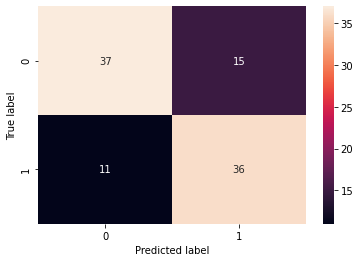

In [32]:
from pyspark.mllib.evaluation import MulticlassMetrics
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType
import seaborn as sns
import matplotlib.pyplot as plt

preds_and_labels = pred_tran_data.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')

preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
cm = metrics.confusionMatrix().toArray()
print('Accuracy score: ',metrics.accuracy)
sns.heatmap(cm,annot = True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
print(cm)

### Evaluation


In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
cv_evalution = BinaryClassificationEvaluator()
params = (ParamGridBuilder()
          .addGrid(gbm.maxDepth,[2,4])
          .addGrid(gbm.maxBins,[20,30])
          .addGrid(gbm.maxIter,[10,20])
          .build())
cv = CrossValidator(estimator = gbm, estimatorParamMaps = params, evaluator = cv_evalution, numFolds = 10)


In [34]:
cv_gbm = cv.fit(training_data)

In [35]:
pred_cv = cv_gbm.transform(test_data)

Accuracy score:  0.7878787878787878
[[42. 10.]
 [11. 36.]]


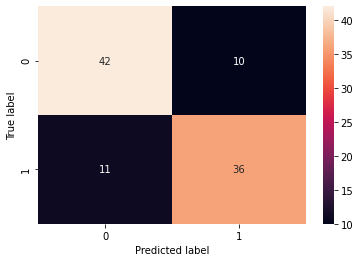

In [36]:
from pyspark.mllib.evaluation import MulticlassMetrics
import pyspark.sql.functions as F
from pyspark.sql.types import FloatType
import seaborn as sns
import matplotlib.pyplot as plt
preds_and_labels_cv = pred_cv.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')

preds_and_labels_cv = preds_and_labels_cv.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels_cv.rdd.map(tuple))
cm = metrics.confusionMatrix().toArray()
print('Accuracy score: ',metrics.accuracy)
sns.heatmap(cm,annot = True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
print(cm)

### Another way to get acc_score

In [37]:
acc = pred_cv.select('label','prediction')

In [38]:
acc_score = acc.filter(acc.label == acc.prediction).count() / acc.count()

In [39]:
print('Accuracy score: ',acc_score)

Accuracy score:  0.7878787878787878
